# EDA
Now that we've got some squeeky clean data lets break apart all of the comments into their base parts and see if we can find any initial patterns

In [1]:
#import blocks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle

from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords

In [2]:
# read in our data
odd_df = pd.read_csv('../data/satisfyingly_clean.csv')
mild_df = pd.read_csv('../data/infuriatingly_clean.csv')
odd_df.head(3)

,author,body,created_utc,subreddit
0,kdwaynec,Be sure to drink your Ovaltine,1635378009,oddlysatisfying
1,FinalF137,Why didn't the red thing below it get stripped...,1635377936,oddlysatisfying
2,HMWWaWChChIaWChCChW,My FIL does this. This is not a fun job.,1635377921,oddlysatisfying


In [3]:
mild_df.head(3)

,author,body,created_utc,subreddit
0,CucumberUSA,I tipped the three 6’s to 667 👍 because I like...,1635375387,mildlyinfuriating
1,sticky-bit,Since my original comment I've found the clip ...,1635375386,mildlyinfuriating
2,No-Ad3157,Anthrax?,1635375384,mildlyinfuriating


Theres a chance that some null values might have been created during the creation of our cleaned datasets. Lets take a quick look to make sure.

In [4]:
odd_df.isna().sum()

author         0
body           4
created_utc    0
subreddit      0
dtype: int64

In [5]:
mild_df.isna().sum()

author         0
body           1
created_utc    0
subreddit      0
dtype: int64

Looks like our cleaning process created some blank fields that werent caught on the way out. We still have a large chunk of our original data so we'll drop these since they were probably blank after having links and stop words removed.

In [6]:
odd_df.dropna(inplace=True)
mild_df.dropna(inplace=True)

In [7]:
# check our shapes again after dropping null values
print(odd_df.shape, mild_df.shape)

(94895, 4) (95271, 4)


In [8]:
print('Percentage of data from oddlysatisfying',odd_df.shape[0]/(odd_df.shape[0] + mild_df.shape[0]))
print('Percentage of data from mildlyinfuriating',mild_df.shape[0]/(odd_df.shape[0] + mild_df.shape[0]))

Percentage of data from oddlysatisfying 0.4990113900486943
Percentage of data from mildlyinfuriating 0.5009886099513057


Looks like our classes overall are still pretty balanced after all the work we've done on them. Lets get a visual of the top words from each subreddit. We'll use CountVectorizer to help us acheive this one.

## Word and Character Counts
Total word and character counts might point us to a difference between the comments on each subreddit. Let's calculate each for the individual subreddits and see if there are any major differences!

In [9]:
# check the length of each comment string and store it in a new column
odd_df['character_count'] = [len(value) for value in odd_df['body']]

# check the word count in a comment string and store it in a new column
odd_df['word_count'] = [len(value.split()) for value in odd_df['body']]

# reorder our columns and check our first few values again
odd_df = odd_df[['body','character_count','word_count','subreddit']]
odd_df.head(3)

,body,character_count,word_count,subreddit
0,Be sure to drink your Ovaltine,30,6,oddlysatisfying
1,Why didn't the red thing below it get stripped...,86,16,oddlysatisfying
2,My FIL does this. This is not a fun job.,40,10,oddlysatisfying


In [10]:
# check the length of each comment string and store it in a new column
mild_df['character_count'] = [len(value) for value in mild_df['body']]

# check the word count in a comment string and store it in a new column
mild_df['word_count'] = [len(value.split()) for value in mild_df['body']]

# reorder our columns and check our first few values again
mild_df = mild_df[['body','character_count','word_count','subreddit']]
mild_df.head(3)

,body,character_count,word_count,subreddit
0,I tipped the three 6’s to 667 👍 because I like...,62,15,mildlyinfuriating
1,Since my original comment I've found the clip ...,96,16,mildlyinfuriating
2,Anthrax?,8,1,mildlyinfuriating


Now that we have our counts let's get some visuals on their distributions. 

Percentage of data with character count lower than 260: 95.01%


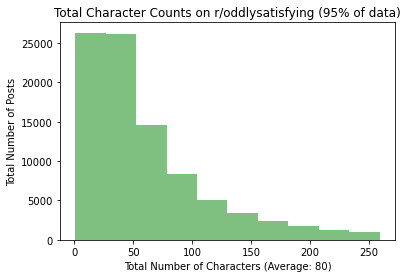

In [11]:
# verify the mask we're using shows at least 95% of our data. Allows us to make more concise graphs 
print(f"Percentage of data with character count lower than 260: {round(len(odd_df[odd_df['character_count'] < 260]['character_count'])/len(odd_df['character_count'])*100,2)}%")

# create a histogram of character count for posts from oddlysatisfying
plt.hist(odd_df[odd_df['character_count'] < 260]['character_count'],color='g', alpha=.5)
plt.title('Total Character Counts on r/oddlysatisfying (95% of data)')
plt.ylabel('Total Number of Posts')
plt.xlabel(f'Total Number of Characters (Average: {int(round(odd_df["character_count"].mean()))})');

Percentage of data with word count lower than 50: 95.34%


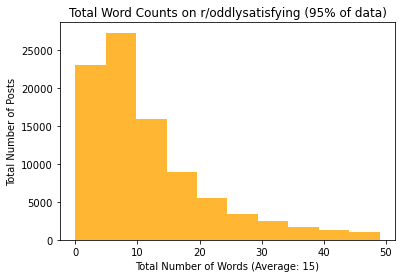

In [12]:
# verify the mask we're using shows at least 95% of our data
print(f"Percentage of data with word count lower than 50: {round(len(odd_df[odd_df['word_count'] < 50]['word_count'])/len(odd_df['word_count'])*100,2)}%")

# create a histogram of word count for posts from oddlysatisfying
plt.hist(odd_df[odd_df['word_count'] < 50]['word_count'],color='orange', alpha=.8)
plt.title('Total Word Counts on r/oddlysatisfying (95% of data)')
plt.ylabel('Total Number of Posts')
plt.xlabel(f'Total Number of Words (Average: {int(round(odd_df["word_count"].mean()))})');

Percentage of data with word count lower than 350: 95.11%


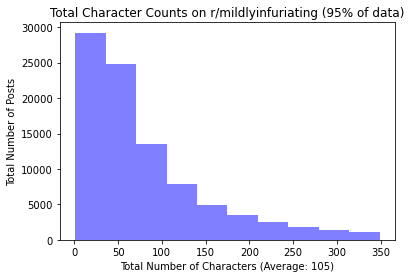

In [13]:
# verify the mask we're using shows at least 95% of our data
print(f"Percentage of data with word count lower than 350: {round(len(mild_df[mild_df['character_count'] < 350]['character_count'])/len(mild_df['character_count'])*100,2)}%")

# create a histogram of character count for posts from mildlyinfuriating
plt.hist(mild_df[mild_df['character_count'] < 350]['character_count'],color='b', alpha=.5)
plt.title('Total Character Counts on r/mildlyinfuriating (95% of data)')
plt.ylabel('Total Number of Posts')
plt.xlabel(f'Total Number of Characters (Average: {int(round(mild_df["character_count"].mean()))})');

Percentage of data with word count lower than 65: 95.13%


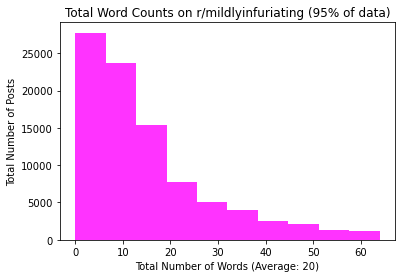

In [14]:
# verify the mask we're using shows at least 95% of our data
print(f"Percentage of data with word count lower than 65: {round(len(mild_df[mild_df['word_count'] < 65]['word_count'])/len(mild_df['word_count'])*100,2)}%")

# create a histogram of word count for posts from mildlyinfuriating
plt.hist(mild_df[mild_df['word_count'] < 65]['word_count'],color='magenta', alpha=.8)
plt.title('Total Word Counts on r/mildlyinfuriating (95% of data)')
plt.ylabel('Total Number of Posts')
plt.xlabel(f'Total Number of Words (Average: {int(round(mild_df["word_count"].mean()))})');

## Sentiment
Another avenue we can take a look at is the sentiment of each comment. We'll use VADER sentiment analysis that comes with the nltk package to approximate this.

In [15]:
# initialize our sentiment analyzer
sia = SentimentIntensityAnalyzer()

# create a new dataframe of sentiment scores for oddlysatisfying
odd_df_sentiment = pd.DataFrame([sia.polarity_scores(comment) for comment in odd_df['body']])

# create a separate dataframe of rounded values to make for easier binning in future visualizations
odd_df_sentiment_rounded = pd.DataFrame() 
for col in odd_df_sentiment.columns: # check each column of the sentiment dataframe
    
    # listcomp to round all values to the nearest tenth in our original sentiment dataframe and store them in our new dataframe
    odd_df_sentiment_rounded[col] = [round(value,1) for value in odd_df_sentiment[col]]
    
# check our work
odd_df_sentiment_rounded.head()

,neg,neu,pos,compound
0,0.0,0.7,0.3,0.3
1,0.0,0.9,0.1,0.3
2,0.3,0.7,0.0,-0.4
3,0.2,0.6,0.2,-0.2
4,0.5,0.4,0.1,-0.6


Found a neat way to make a legend manually for pyplots that cant be made automatically on stackoverflow. Credit to user [ImportanceOfBeingErnest](https://stackoverflow.com/users/4124317/importanceofbeingernest) for [this post](https://stackoverflow.com/questions/43872450/matplotlib-histogram-with-multiple-legend-entries).

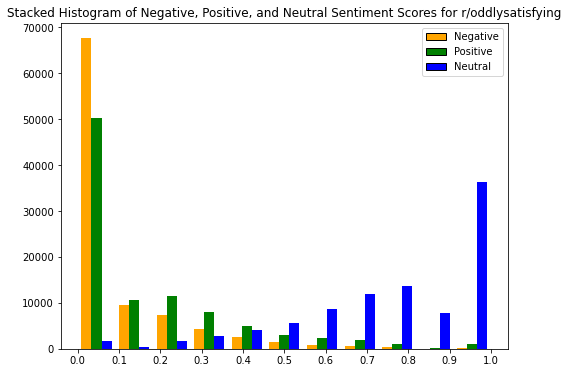

In [16]:
# make a stacked histogram of value distributions for each sentiment sub score for oddlysatisfying
plt.figure(figsize=(8,6))
plt.hist([odd_df_sentiment_rounded['neg'], odd_df_sentiment_rounded['pos'], odd_df_sentiment_rounded['neu']], bins=11, color=['orange','g','b'])
plt.xticks([0.1*num for num in range(11)]);
plt.title('Stacked Histogram of Negative, Positive, and Neutral Sentiment Scores for r/oddlysatisfying')

# DIY legend by creating the rectangles manually and assigning a color map and labels
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in ['orange','g','b']]
labels= ["Negative","Positive", "Neutral"]
plt.legend(handles, labels);

In [17]:
# create a new dataframe of sentiment scores for oddlysatisfying
mild_df_sentiment = pd.DataFrame([sia.polarity_scores(comment) for comment in mild_df['body']])

# same method of creating a rounded dataframe but for mildly infuriating this time
mild_df_sentiment_rounded = pd.DataFrame()
for col in mild_df_sentiment.columns:
    mild_df_sentiment_rounded[col] = [round(value,1) for value in mild_df_sentiment[col]]
mild_df_sentiment_rounded.head()

,neg,neu,pos,compound
0,0.0,0.8,0.2,0.4
1,0.0,0.9,0.1,0.3
2,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,0.6,0.4,0.8


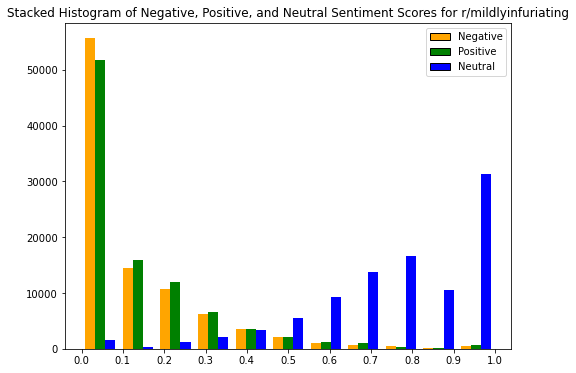

In [18]:
# make a stacked histogram of value distributions for each sentiment sub score for mildlyinfuriating
plt.figure(figsize=(8,6))
plt.hist([mild_df_sentiment_rounded['neg'], mild_df_sentiment_rounded['pos'], mild_df_sentiment_rounded['neu']], bins=11, color=['orange','g','b'])
plt.xticks([0.1*num for num in range(11)]);
plt.title('Stacked Histogram of Negative, Positive, and Neutral Sentiment Scores for r/mildlyinfuriating')

# create our manual legend
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in ['orange','g','b']]
labels= ["Negative","Positive", "Neutral"]
plt.legend(handles, labels);

Not getting very far with looking at all the values together for each subreddit. Lets compare each score type separately and put each subreddit's score counts side by side.

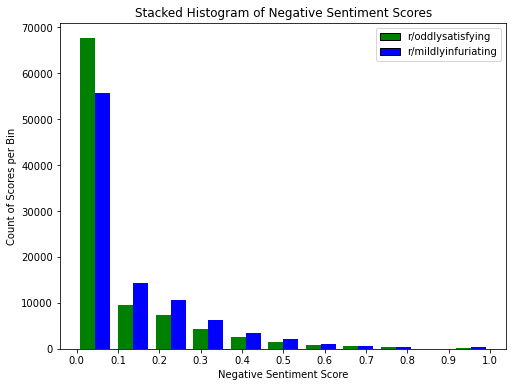

In [19]:
# stacked histogram of negative sentiment scores
plt.figure(figsize=(8,6))
plt.hist([odd_df_sentiment_rounded['neg'], mild_df_sentiment_rounded['neg']], bins=11, color=['g','b'])
plt.xticks([0.1*num for num in range(11)]);
plt.title('Stacked Histogram of Negative Sentiment Scores')
plt.ylabel('Count of Scores per Bin')
plt.xlabel('Negative Sentiment Score')

# create our manual legend
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in ['g','b']]
labels= ["r/oddlysatisfying","r/mildlyinfuriating"]
plt.legend(handles, labels);

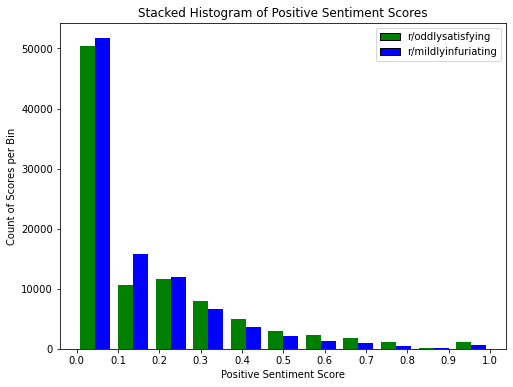

In [20]:
# stacked histogram of positive sentiment scores
plt.figure(figsize=(8,6))
plt.hist([odd_df_sentiment_rounded['pos'], mild_df_sentiment_rounded['pos']], bins=11, color=['g','b'])
plt.xticks([0.1*num for num in range(11)]);
plt.title('Stacked Histogram of Positive Sentiment Scores')
plt.ylabel('Count of Scores per Bin')
plt.xlabel('Positive Sentiment Score')

# manual legend
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in ['g','b']]
labels= ["r/oddlysatisfying","r/mildlyinfuriating"]
plt.legend(handles, labels);

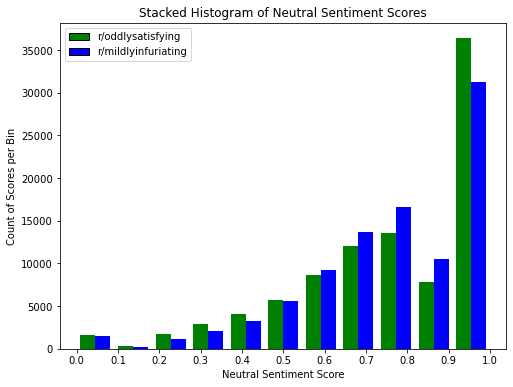

In [21]:
# stacked histogram of neutral sentiment scores
plt.figure(figsize=(8,6))
plt.hist([odd_df_sentiment_rounded['neu'], mild_df_sentiment_rounded['neu']], bins=11, color=['g','b'])
plt.xticks([0.1*num for num in range(11)]);
plt.title('Stacked Histogram of Neutral Sentiment Scores')
plt.ylabel('Count of Scores per Bin')
plt.xlabel('Neutral Sentiment Score')

# manual legend
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in ['g','b']]
labels= ["r/oddlysatisfying","r/mildlyinfuriating"]
plt.legend(handles, labels);

There is some small variance between sentiments for both subreddits so lets add these values to our data for modeling later.

In [22]:
# create new sentiment score columns for oddlysatisfying and reorder our dataframe for easier viewing
odd_df[['neg_sent','neu_sent','pos_sent','comp_sent']] = odd_df_sentiment
odd_df = odd_df[['body','character_count','word_count','neg_sent','neu_sent','pos_sent','comp_sent','subreddit']]
odd_df.head(3)

,body,character_count,word_count,neg_sent,neu_sent,pos_sent,comp_sent,subreddit
0,Be sure to drink your Ovaltine,30,6,0.000,0.685,0.315,0.3182,oddlysatisfying
1,Why didn't the red thing below it get stripped...,86,16,0.000,0.877,0.123,0.2732,oddlysatisfying
2,My FIL does this. This is not a fun job.,40,10,0.252,0.748,0.000,-0.4023,oddlysatisfying


In [23]:
# create new sentiment score columns for mildly infuriating and reorder our dataframe for easier viewing
mild_df[['neg_sent','neu_sent','pos_sent','comp_sent']] = mild_df_sentiment
mild_df = mild_df[['body','character_count','word_count','neg_sent','neu_sent','pos_sent','comp_sent','subreddit']]
mild_df.head(3)

,body,character_count,word_count,neg_sent,neu_sent,pos_sent,comp_sent,subreddit
0,I tipped the three 6’s to 667 👍 because I like...,62,15,0.0,0.815,0.185,0.3612,mildlyinfuriating
1,Since my original comment I've found the clip ...,96,16,0.0,0.867,0.133,0.3182,mildlyinfuriating
2,Anthrax?,8,1,0.0,1.000,0.000,0.0000,mildlyinfuriating


## Most Common Words
Next let's take a closer look at the most common words for each subreddit to see if we can get any ideas. We'll use Countvectorizer to convert each comment into a bag of words that we can count. Then we'll use that data to find the ones that occur most frequently!

In [24]:
# initialize our transformer
cvec = CountVectorizer()

# transform our oddlysatisfying comments into bags of words and convert to a dataframe for exploration
odd_cvec = cvec.fit_transform(odd_df['body'])
odd_data_df = pd.DataFrame(odd_cvec.todense().astype('uint8'), columns = cvec.get_feature_names())
odd_data_df.head()

,00,000,0000000005x,00001,0001,000kg,000lbs,000mins,000nm,000th,...,𝘵𝘰𝘰𝘰𝘰,𝚃𝚑𝚎𝚢,𝚏𝚘𝚛𝚌𝚎,𝚑𝚒𝚝,𝚘𝚏,𝚜𝚞𝚗𝚜,𝚝𝚑𝚎,𝚝𝚑𝚎𝚖,𝚝𝚑𝚘𝚞𝚜𝚊𝚗𝚍,𝚠𝚒𝚝𝚑
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
#store our 100 most common words from oddlysatisfying for comparison later
common_odd = odd_data_df.sum().sort_values(ascending=False).head(100)
common_odd_ind = common_odd.index

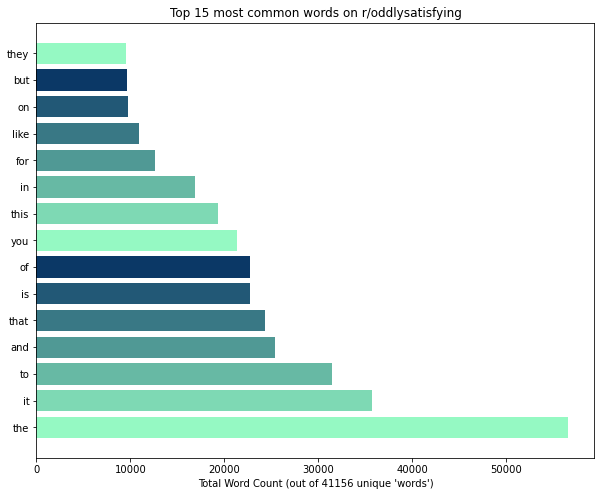

In [26]:
# top 15 most common words on r/oddlysatisfying
plt.figure(figsize=(10,8))
plt.barh(common_odd_ind[:15],common_odd.head(15), color=["#95F9C3","#7ED9B4","#67B9A4","#509995","#397885","#225876","#0B3866"])
plt.title('Top 15 most common words on r/oddlysatisfying')
plt.xlabel(f'Total Word Count (out of {len(cvec.get_feature_names())} unique \'words\')')
plt.savefig('../images/odd_no_stop.png');

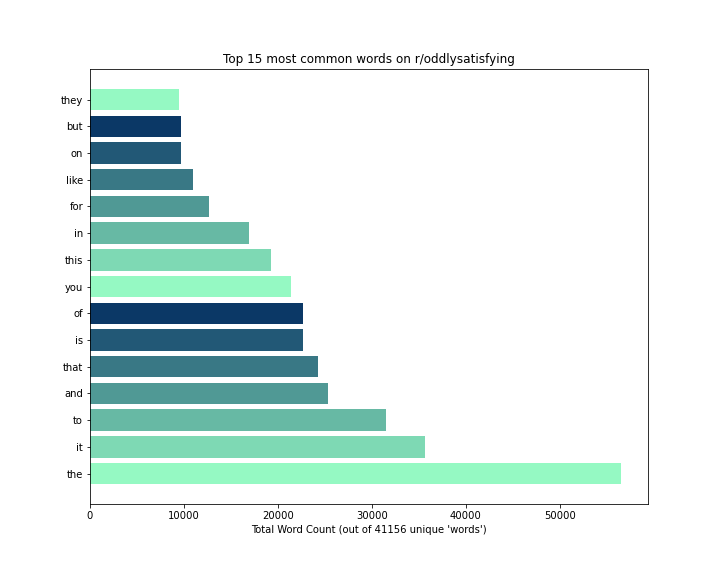

In [27]:
# transform our mildlyinfuriating comments into bags of words and convert to a dataframe for exploration
mild_cvec = cvec.fit_transform(mild_df['body'])
mild_data_df = pd.DataFrame(mild_cvec.todense().astype('uint8'), columns = cvec.get_feature_names())
common_mild = mild_data_df.sum().sort_values(ascending=False).head(100)
#store our 100 most common words for comparison later
common_mild_ind = common_mild.index

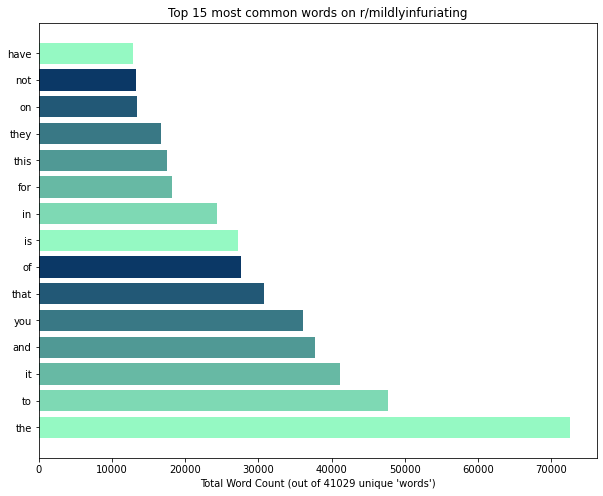

In [28]:
# top 15 most common words after removing english stop words and punctuation and lemmatization for r/mildlyinfuriating
plt.figure(figsize=(10,8))
plt.barh(common_mild_ind[:15],common_mild.head(15), color=["#95F9C3","#7ED9B4","#67B9A4","#509995","#397885","#225876","#0B3866"])
plt.title('Top 15 most common words on r/mildlyinfuriating')
plt.xlabel(f'Total Word Count (out of {len(cvec.get_feature_names())} unique \'words\')');
plt.savefig('../images/mild_no_stop.png')

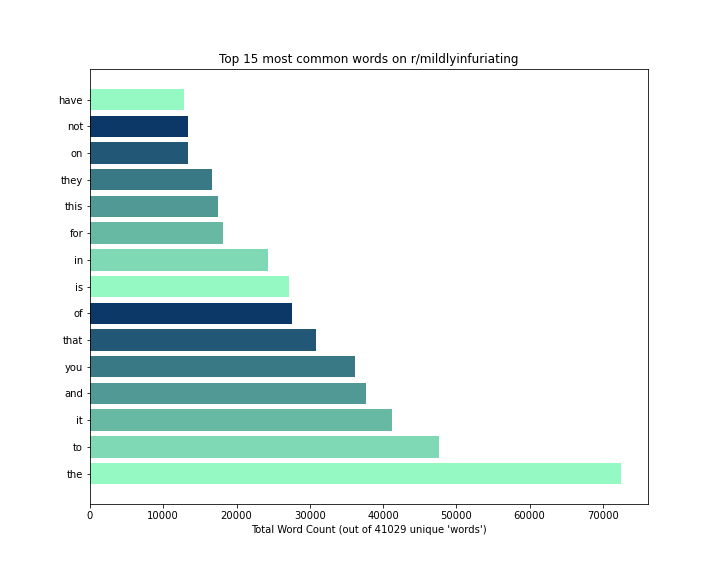

In [29]:
# find our shared top 100 most common words in each subreddit
match_words = [word for word in common_odd_ind if word in common_mild_ind]
print(match_words)

['the', 'it', 'to', 'and', 'that', 'is', 'of', 'you', 'this', 'in', 'for', 'like', 'on', 'but', 'they', 'was', 'my', 'not', 'with', 'just', 'be', 'so', 'are', 'have', 'can', 'what', 'me', 'if', 'as', 'do', 'or', 'at', 'one', 'all', 'how', 'your', 'would', 'there', 'don', 'he', 'get', 'out', 'an', 'from', 'when', 'no', 'up', 'more', 'we', 'about', 're', 'some', 'them', 'know', 'think', 'time', 'why', 'people', 'see', 'good', 'really', 'now', 'too', 'make', 'much', 'by', 'then', 'had', 'because', 've', 'has', 'way', 'will', 'also', 'than', 'only', 'their', 'could', 'here', 'where', 'even', 'lol', 'did', 'off', 'same', 'who', 'work', 'right']


In [30]:
# re-initialize our transformer but this time making it account for english stop words
cvec = CountVectorizer(stop_words = 'english')

# transform our oddlysatisfying comments into bags of words and convert to a dataframe
odd_cvec = cvec.fit_transform(odd_df['body'])
odd_data_df = pd.DataFrame(odd_cvec.todense().astype('uint8'), columns = cvec.get_feature_names())

# recheck our new top 100 most common words
common_odd = odd_data_df.sum().sort_values(ascending=False).head(100)
common_odd_ind = common_odd.index

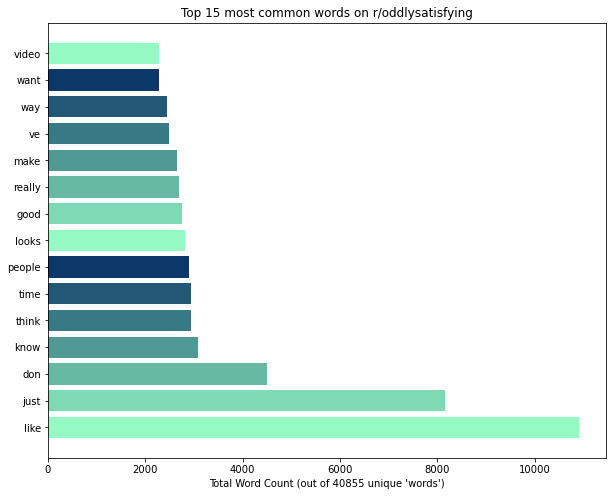

In [31]:
# top 15 most common words after removing english stop words and punctuation and lemmatization for r/oddlysatisfying
plt.figure(figsize=(10,8))
plt.barh(common_odd_ind[:15],common_odd.head(15), color=["#95F9C3","#7ED9B4","#67B9A4","#509995","#397885","#225876","#0B3866"])
plt.title('Top 15 most common words on r/oddlysatisfying')
plt.xlabel(f'Total Word Count (out of {len(cvec.get_feature_names())} unique \'words\')')
plt.savefig('../images/odd_with_stop.png');

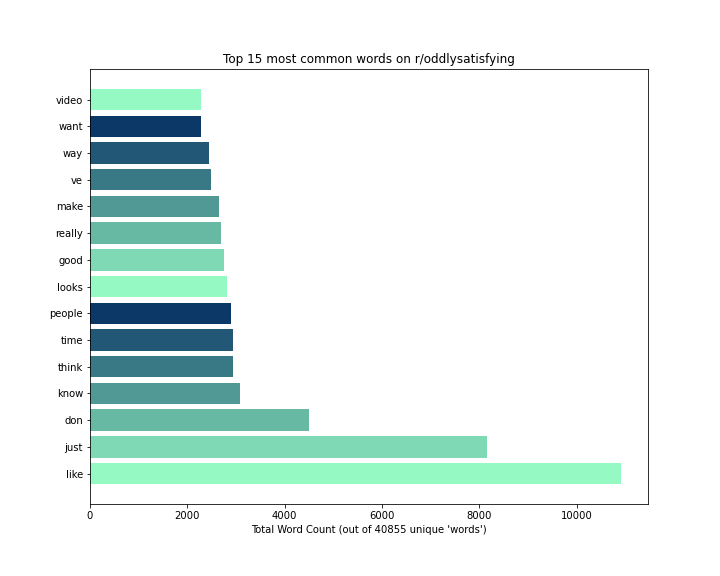

In [32]:
# transform our mildlyinfuriating comments into bags of words and convert to a dataframe
mild_cvec = cvec.fit_transform(mild_df['body'])
mild_data_df = pd.DataFrame(mild_cvec.todense().astype('uint8'), columns = cvec.get_feature_names())
common_mild = mild_data_df.sum().sort_values(ascending=False).head(100)

# recheck our new top 100 most common words
common_mild_ind = common_mild.index

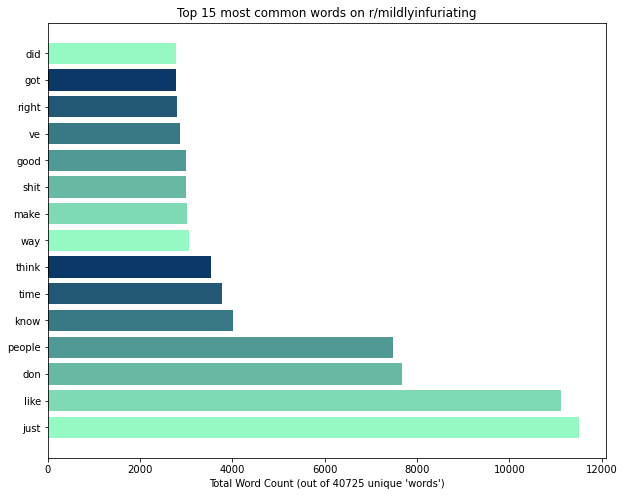

In [33]:
# top 15 most common words after removing english stop words and punctuation and lemmatization for r/mildlyinfuriating
plt.figure(figsize=(10,8))
plt.barh(common_mild_ind[:15],common_mild.head(15), color=["#95F9C3","#7ED9B4","#67B9A4","#509995","#397885","#225876","#0B3866"])
plt.title('Top 15 most common words on r/mildlyinfuriating')
plt.xlabel(f'Total Word Count (out of {len(cvec.get_feature_names())} unique \'words\')')
plt.savefig('../images/mild_with_stop.png');

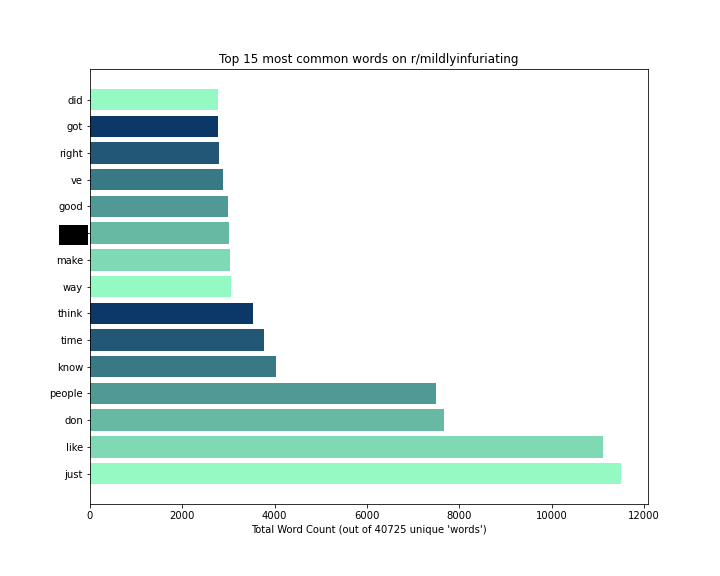

In [34]:
# compare our matching words again
match_words = [word for word in common_odd_ind if word in common_mild_ind]
match_words += stopwords.words('english')
print(match_words)

['like', 'just', 'don', 'know', 'think', 'time', 'people', 'looks', 'good', 'really', 'make', 've', 'way', 'want', 'lol', 'thing', 'did', 'work', 'right', 'need', 'use', 'look', 'does', 'water', 'got', 'thought', 'used', 'yeah', 'going', 'shit', 'pretty', 'say', 'actually', 'probably', 'sure', 'didn', 'll', 'doesn', 'little', 'makes', 'lot', 'day', 'yes', 'years', 'things', 'better', 'oh', 'isn', 'feel', 'doing', 'long', 'man', 'stuff', 'fuck', 'different', 'maybe', 'mean', 'gt', 'new', 'bad', 'getting', 'said', 'job', 'fucking', 'life', 'point', 'old', 'post', 'car', 'eat', 'person', 'house', 'wrong', 'big', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am

In [35]:
# one final check adding our top matches to our stop words to see if we get a better divergence of top shared words
cvec = CountVectorizer(stop_words = match_words)

odd_cvec = cvec.fit_transform(odd_df['body'])
odd_data_df = pd.DataFrame(odd_cvec.todense().astype('uint8'), columns = cvec.get_feature_names())

common_odd = odd_data_df.sum().sort_values(ascending=False).head(100)
common_odd_ind = common_odd.index

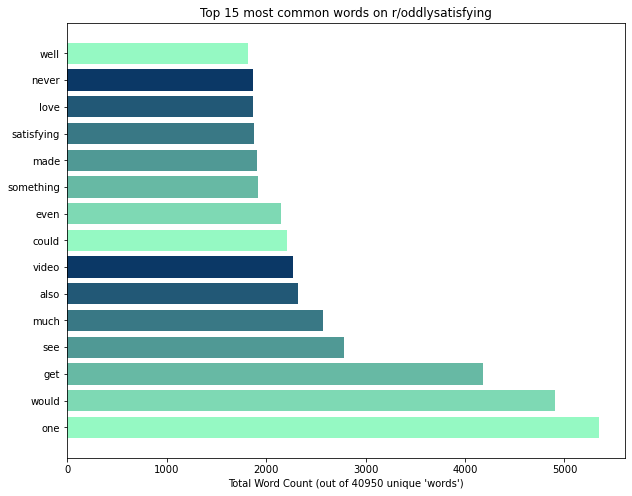

In [36]:
# top 15 most common words after removing english stop words and shared top shared words for r/oddlysatisfying
plt.figure(figsize=(10,8))
plt.barh(common_odd_ind[:15],common_odd.head(15), color=["#95F9C3","#7ED9B4","#67B9A4","#509995","#397885","#225876","#0B3866"])
plt.title('Top 15 most common words on r/oddlysatisfying')
plt.xlabel(f'Total Word Count (out of {len(cvec.get_feature_names())} unique \'words\')')
plt.savefig('../images/odd_with_stop_common.png');

In [37]:
mild_cvec = cvec.fit_transform(mild_df['body'])
mild_data_df = pd.DataFrame(mild_cvec.todense().astype('uint8'), columns = cvec.get_feature_names())

common_mild = mild_data_df.sum().sort_values(ascending=False).head(100)
common_mild_ind = common_mild.index

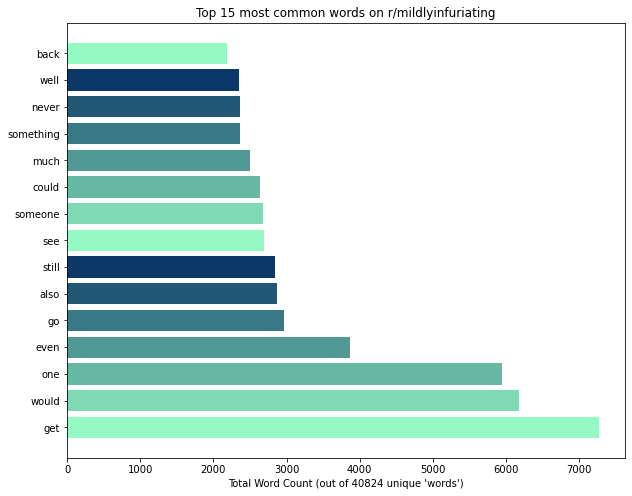

In [38]:
# top 15 most common words after removing english stop words and shared top shared words for r/mildlyinfuriating
plt.figure(figsize=(10,8))
plt.barh(common_mild_ind[:15],common_mild.head(15), color=["#95F9C3","#7ED9B4","#67B9A4","#509995","#397885","#225876","#0B3866"])
plt.title('Top 15 most common words on r/mildlyinfuriating')
plt.xlabel(f'Total Word Count (out of {len(cvec.get_feature_names())} unique \'words\')')
plt.savefig('../images/mild_with_stop_common.png');

It looks like there are still several shared top words. For now lets move on since we've already cleared out so many share words. It may be worth coming back to later to see if we can find the truely unique words to each subreddit to help us increase our model accuracy.

## Storing results
Now that we've had some fun exploring our data sets individually lets combine them for modeling in the next notebook. We wont store the vectorized values in this case because they take up far too much space so we'll reconvert these in the modeling notebook.

In [39]:
# designate oddlysatisfying as our positive class and mildlyinfuriating as our negative class
odd_df['subreddit'] = 1
mild_df['subreddit'] = 0

# combine the first third of two datasets and combine them into one set. Only collecting one-third of the total data due to resource constraints. Sampled the entire dataframe at the end to shuffle our results.
data = pd.concat([odd_df[odd_df.columns][:len(odd_df)//3],mild_df[mild_df.columns][:len(mild_df)//3]]).drop('character_count', axis=1).sample(frac=1)

# change the body column label to comment
data.rename({'body':'comment'},axis=1,inplace=True)

# export our data for modeling
data.to_csv('../data/reddit_comments_partial.csv',index=False)

In [40]:
data.head()

,comment,word_count,neg_sent,neu_sent,pos_sent,comp_sent,subreddit
6707,Do you realize how disingenuous that comment i...,18,0.000,0.865,0.135,0.3612,0
8045,Even if you weren’t familiar with starbursts y...,16,0.000,0.737,0.263,0.6124,0
30164,you sound like a street smart guy,7,0.000,0.518,0.482,0.4199,0
15709,Bladder of steel. Will help with incontinence ...,10,0.000,0.769,0.231,0.4019,1
1770,WHO the hell needs more than one of those? No...,17,0.327,0.673,0.000,-0.8074,0
